# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I will analyze data from [gapminder.org](https://www.gapminder.org/data/) to explore worldwide CO2 emissions and their relationship to other variables. To start, I will explore CO2 emissions per country to discover trends.

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions

### General Properties

In [2]:
# Load data
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_regions = pd.read_csv('regions.csv')
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

# Rename first column to more descriptive 'country'
df_co2.rename(columns={"geo": "country"}, inplace=True)
df_gdp.rename(columns={"geo": "country"}, inplace=True)

In [3]:
# Print head of CO2 df
df_co2.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [4]:
# Print head of df_regions
df_regions.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,World bank income group 2017
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,19/11/1946,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14/12/1955,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8/10/1962,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28/7/1993,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1/12/1976,Sub-Saharan Africa,Lower middle income


In [5]:
# Print head of GDP df
df_gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


#### CO2 DataFrame

In [5]:
# Check for missing data
missing = df_co2.isnull().sum().sum()
total = df_co2.shape[0] * df_co2.shape[1]
print('Missing {} out of {} data points ({}%)'.format(missing, total, round(missing*100/total)))

Missing 24375 out of 41472 data points (59.0%)


In [6]:
# Get an idea for where missing data are located
df_co2.isnull().sum()

country      0
1800       187
1801       187
1802       185
1803       187
1804       186
1805       187
1806       187
1807       186
1808       187
1809       187
1810       186
1811       186
1812       186
1813       186
1814       186
1815       186
1816       186
1817       186
1818       186
1819       185
1820       185
1821       185
1822       185
1823       185
1824       185
1825       185
1826       185
1827       185
1828       185
          ... 
1985        20
1986        20
1987        20
1988        20
1989        20
1990        16
1991        15
1992         4
1993         4
1994         3
1995         3
1996         3
1997         3
1998         3
1999         3
2000         3
2001         3
2002         2
2003         2
2004         2
2005         2
2006         2
2007         1
2008         1
2009         1
2010         1
2011         1
2012         0
2013         0
2014         0
Length: 216, dtype: int64

As we can see above, this database has a lot of missing data (>50% of data points are missing). More data are available for that past 30 years or so than the first 30 years, for which only a few countries have data. This is to be expected since data collection has become easier and more widespread only in the last few decades. I suspect that this problem is worse for developing countries, which have fewer resources to focus on data collection, and could mean that my analysis could be biased if developed nations end up being over-represented in the data. For this reason, I will use several methods to fill in missing values as opposed to discarding countries.

#### GDP DataFrame

In [7]:
# Check for missing data
missing = df_gdp.isnull().sum().sum()
total = df_gdp.shape[0] * df_gdp.shape[1]
print('Missing {} out of {} data points ({}%)'.format(missing, total, round(missing*100/total)))

Missing 0 out of 42460 data points (0.0%)


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)


#### CO2 DataFrame

In order to deal with the missing data in the CO2 DataFrame, I will use several techniques. To start, I will use linear interpolation to fill the missing values which are in between two existing values.

In [8]:
# Set 'country' column as index to allow for interpolation
df_co2.set_index('country', inplace=True)

# Use linear interpolation to fill missing values between two available values
df_co2.interpolate(method='linear', axis=1, inplace=True)

# Print number of remaining missing values
df_co2.isnull().sum().sum()

23722

While helpful, we still have 23,722 missing values after aplying interpolation . Next up, I will simply drop all years except for the last 100. While this number is somewhat arbitrary, analyzing the last 100 years should be enough to explore trends in CO2 emissions.

In [9]:
df_co2 = df_co2.iloc[:,-100:]
df_co2.head()

,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
Algeria,0.000582,0.00064,0.00126,0.0031,0.00306,0.00363,0.00418,0.00413,0.00233,0.0046,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [10]:
# Check for missing data
missing = df_co2.isnull().sum().sum()
total = df_co2.shape[0] * df_co2.shape[1]
print('Missing {} out of {} data points ({}%)'.format(missing, total, round(missing*100/total)))

Missing 5201 out of 19200 data points (27.0%)


As seen above, we still have over 25% of missing values, even after dropping the years with a higher prevalence of missing values. I'd like to fill the remaining missing values with an average of CO2 emissions for each year. However, in order to avoid clumping regions with high emissions with regions with low emissions, I'd like to first group countries by region and use the region mean to populate missing values for other countries in that region. To do this, we'll have to use the DataFrame containing each country's region (df_regions).

In [11]:
# Select only rows (i.e. countries) that have <25% missing values

#df_co2 = df_co2[df_co2.isnull().mean(axis=1) < 0.25]
#df_co2.shape

In [12]:
#x = df_co2.columns.astype(int)
#fig, ax = plt.subplots(figsize=(15,10))
#y = df_co2.mean()
#ax.plot(x,y)

In [13]:
# Drop columns we won't be using for 'regions' DataFrame
df_regions.drop(['geo', 'members_oecd_g77', 'Latitude', 'Longitude', 'UN member since'], axis=1, inplace=True)

# Rename first column to more descriptive 'country'
df_regions.rename(columns={"name": "country"}, inplace=True)
df_regions.head()

,country,four_regions,eight_regions,six_regions,World bank region,World bank income group 2017
0,Afghanistan,asia,asia_west,south_asia,South Asia,Low income
1,Albania,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income
2,Algeria,africa,africa_north,middle_east_north_africa,Middle East & North Africa,Upper middle income
3,Andorra,europe,europe_west,europe_central_asia,Europe & Central Asia,High income
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Lower middle income


In [14]:
# Create new df with merged data
df_co2_w_region = df_regions.merge(df_co2, on='country')
df_co2_w_region.head()

,country,four_regions,eight_regions,six_regions,World bank region,World bank income group 2017,1915,1916,1917,1918,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,asia,asia_west,south_asia,South Asia,Low income,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,africa,africa_north,middle_east_north_africa,Middle East & North Africa,Upper middle income,0.000582,0.00064,0.00126,0.0031,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,europe,europe_west,europe_central_asia,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [15]:
# Show count of non-missing values per year
df_co2_w_region.groupby('World bank region').count().iloc[:,5:]

,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
World bank region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,7,7,7,7,7,7,7,7,7,7,...,30,30,30,30,30,30,30,30,30,30
Europe & Central Asia,36,36,36,36,36,36,36,36,36,36,...,49,49,50,50,50,50,50,50,50,50
Latin America & Caribbean,7,7,8,8,8,8,9,9,9,9,...,33,33,33,33,33,33,33,33,33,33
Middle East & North Africa,3,4,4,4,4,4,4,4,4,5,...,21,21,21,21,21,21,21,21,21,21
North America,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
South Asia,1,1,1,1,1,1,1,1,1,1,...,8,8,8,8,8,8,8,8,8,8
Sub-Saharan Africa,3,3,3,3,3,4,4,4,4,4,...,47,47,47,47,47,47,47,48,48,48


When grouping by 'World Bank region' above, I can confirm my suspicion that developing countries will have more missing data than developed nations. As we can see, only 3/48 countries in Sub-Saharan Africa have data for the first few years, while 36/50 and 2/2 have data in Europe & Central Asia and North America, respectively. I will proceed with imputation based on mean by World Bank region, but we should keep in mind that earlier data will be less reliable than data for the past few years.

In [16]:
# Show mean CO2 emissions by region
df_co2_w_region.groupby('World bank region').mean()

,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
World bank region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1.422719,1.378370,1.387049,1.432520,1.340066,1.339243,1.219523,1.246697,1.284447,1.345371,...,3.988000,3.934233,4.247133,4.425667,4.413100,4.513300,4.646500,4.644767,4.715033,4.613100
Europe & Central Asia,1.989370,1.976942,1.706283,1.520525,1.386217,1.630919,1.494358,1.708871,1.794462,2.022525,...,7.008082,7.116735,6.987240,6.945940,6.359560,6.669260,6.519420,6.325340,6.244720,5.987400
Latin America & Caribbean,0.591614,0.637214,0.632725,0.748413,0.809500,1.169275,1.192974,1.167844,1.154022,1.304967,...,3.272970,3.421030,3.517848,3.556333,3.578333,3.665303,3.647152,3.673727,3.711455,3.631212
Middle East & North Africa,0.045067,0.050202,0.074140,0.098050,0.111365,0.128807,0.166670,0.202457,0.246458,0.226140,...,10.612381,10.780238,10.420714,10.372762,10.024762,9.880952,9.580714,10.039429,9.522286,9.978714
North America,10.405000,11.965000,13.050000,13.550000,11.305000,12.770000,10.890000,10.150000,13.300000,11.435000,...,18.450000,17.900000,18.050000,17.650000,16.550000,16.550000,16.300000,15.550000,15.550000,15.800000
South Asia,0.140000,0.140000,0.146000,0.163000,0.177000,0.143000,0.153000,0.149000,0.153000,0.163000,...,0.689863,0.753188,0.772887,0.819000,0.854000,0.889750,0.975125,1.033625,1.024250,1.140000
Sub-Saharan Africa,1.122000,1.299200,1.375700,1.275200,1.300633,1.064617,1.036808,0.877800,1.045500,1.080725,...,0.933315,0.947328,0.931045,0.945347,0.891613,0.892687,0.889591,0.877654,0.872792,0.929798


In [17]:
# Copy df to be cleaned
df_co2_clean = df_co2_w_region

# Replace missing values with in-group mean by World Bank region
df_co2_clean.iloc[:,6:] = df_co2_clean.groupby("World bank region").transform(lambda x: x.fillna(x.mean()))

# Show cleaned DF
df_co2_clean.head()

,country,four_regions,eight_regions,six_regions,World bank region,World bank income group 2017,1915,1916,1917,1918,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,asia,asia_west,south_asia,South Asia,Low income,0.140000,0.140000,0.146000,0.163000,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income,1.989370,1.976942,1.706283,1.520525,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,africa,africa_north,middle_east_north_africa,Middle East & North Africa,Upper middle income,0.000582,0.000640,0.001260,0.003100,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,europe,europe_west,europe_central_asia,Europe & Central Asia,High income,1.989370,1.976942,1.706283,1.520525,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Lower middle income,1.122000,1.299200,1.375700,1.275200,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


As we can see above, now I have a clean DataFrame with no missing values.

#### GDP DataFrame

As we saw above, the GDP DataFrame has no missing values. The only data cleaning necessary will be to trim the DataFrame to include only the years we are interested in for this analysis.

In [18]:
# Trim dataframe to include years 1915-2014
df_gdp.set_index('country', inplace=True)
df_gdp = df_gdp.iloc[:, -104:-4]
df_gdp.head()

,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,837,841,845,849,853,857,863,868,874,880,...,1140,1160,1290,1300,1530,1610,1660,1840,1810,1780
Albania,1420,1440,1460,1480,1500,1520,1540,1560,1580,1600,...,7460,7920,8450,9150,9530,9930,10200,10400,10500,10700
Algeria,2170,2210,2240,2280,2320,2360,2420,2480,2540,2600,...,12300,12300,12600,12700,12600,12900,13000,13200,13300,13500
Andorra,3850,3920,3980,4050,4120,4190,4260,4330,4410,4480,...,39800,42700,43400,41400,41700,39000,42000,41900,43700,44900
Angola,1080,1110,1140,1170,1210,1250,1290,1330,1370,1410,...,3950,4600,5440,5980,5910,5900,5910,6000,6190,6260


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [19]:
df_co2_clean.mean()

1915    1.241696
1916    1.300480
1917    1.263875
1918    1.225896
1919    1.171986
1920    1.254166
1921    1.181993
1922    1.194070
1923    1.299598
1924    1.382026
1925    1.388679
1926    1.380564
1927    1.416879
1928    1.365516
1929    1.442384
1930    1.334608
1931    1.182548
1932    1.099259
1933    1.124685
1934    1.278344
1935    1.372078
1936    1.597010
1937    1.946139
1938    1.953463
1939    3.056048
1940    3.225736
1941    2.637904
1942    2.251045
1943    2.555330
1944    2.761828
          ...   
1985    4.607514
1986    4.627454
1987    4.648269
1988    4.743098
1989    4.835781
1990    4.535076
1991    4.454028
1992    4.379201
1993    4.429574
1994    4.383382
1995    4.347825
1996    4.357904
1997    4.397982
1998    4.388642
1999    4.323162
2000    4.432320
2001    4.498139
2002    4.443069
2003    4.563516
2004    4.603001
2005    4.625678
2006    4.689791
2007    4.680590
2008    4.700430
2009    4.488049
2010    4.585333
2011    4.531346
2012    4.5269

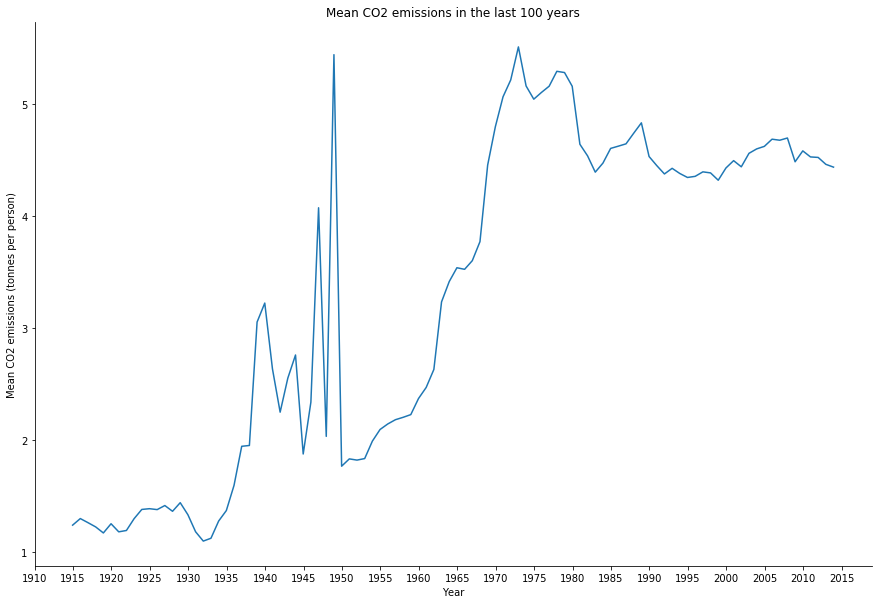

In [20]:
# Plot mean CO2 emissions against time
x = df_co2_clean.columns[6:].astype(int)
y = df_co2_clean.mean()

# Initialize figure
fig, ax = plt.subplots(figsize=(15,10))

# Format graph
ax.set_title('Mean CO2 emissions in the last 100 years')
ax.set_ylabel('Mean CO2 emissions (tonnes per person)')
ax.set_xlabel('Year')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot
ax.plot(x,y)

# Change x ticks to every 5 years
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5));

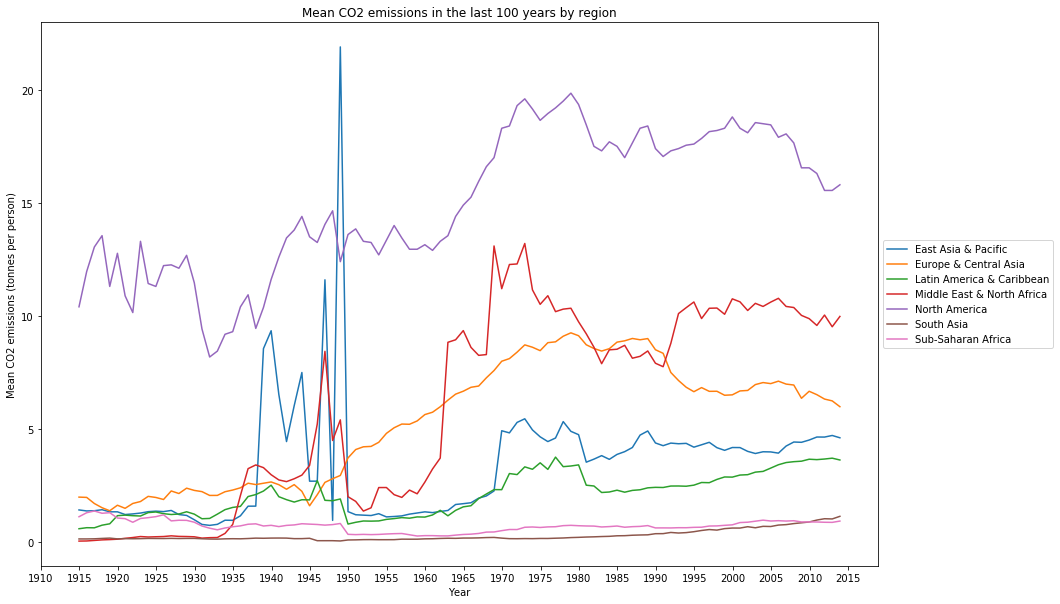

In [21]:
# Plot mean CO2 emissions against time by region
x = df_co2_clean.columns[6:].astype(int)
y = df_co2_clean.mean()

# Initialize figure
fig, ax = plt.subplots(figsize=(15,10))

# Format graph
ax.set_title('Mean CO2 emissions in the last 100 years by region')
ax.set_ylabel('Mean CO2 emissions (tonnes per person)')
ax.set_xlabel('Year')


# Plot
for i in range(df_co2_clean.groupby('World bank region').mean().shape[0]):
    ax.plot(x, df_co2_clean.groupby('World bank region').mean().iloc[i])

# Show legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Change x ticks to every 5 years
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5));

### Research Question 2  (Replace this header name!)

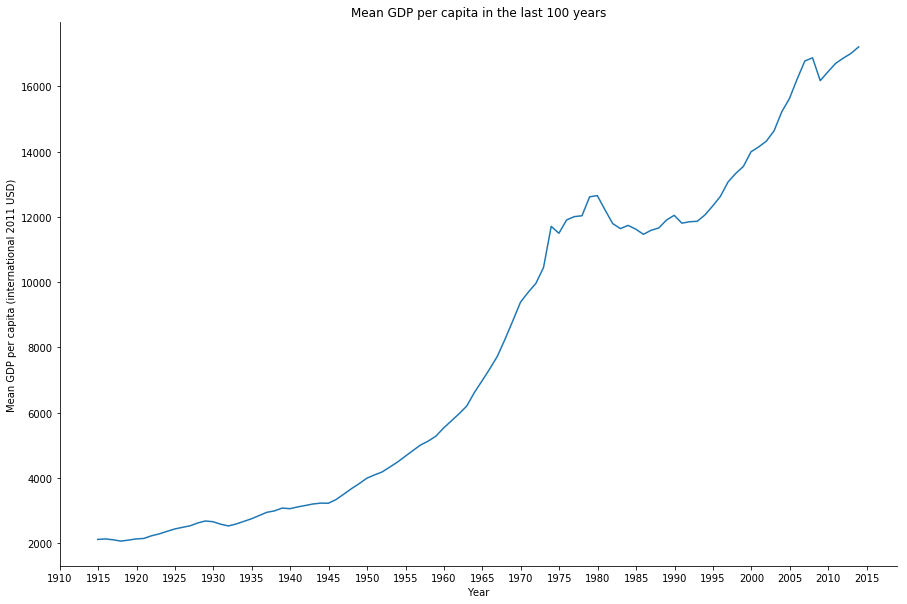

In [22]:
# Plot mean GDP against time
x = df_gdp.columns.astype(int)
y = df_gdp.mean()

# Initialize figure
fig, ax = plt.subplots(figsize=(15,10))

# Format graph
ax.set_title('Mean GDP per capita in the last 100 years')
ax.set_ylabel('Mean GDP per capita (international 2011 USD)')
ax.set_xlabel('Year')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot
ax.plot(x,y);

# Change x ticks to every 5 years
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5));

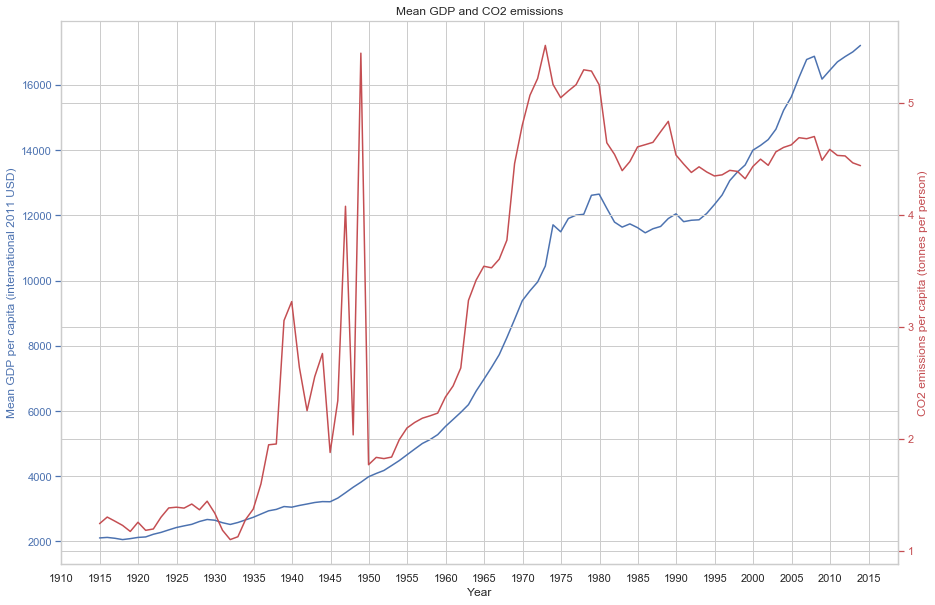

In [23]:
sns.set(style=None)

# Plot mean GDP against time
x = df_gdp.columns.astype(int)
y1 = df_gdp.mean()
y2 = df_co2_clean.mean()

# Initialize figure
fig, ax1 = plt.subplots(figsize=(15,10))

# Format graph
ax1.set_title('Mean GDP and CO2 emissions')
ax1.set_ylabel('Mean GDP per capita (international 2011 USD)', color='b')
ax1.set_xlabel('Year')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.tick_params('y', colors='b')
ax1.spines['top'].set_visible(False)

ax2 = ax1.twinx()
ax2.set_ylabel('CO2 emissions per capita (tonnes per person)', color='r')
ax2.tick_params('y', colors='r')

# Plot
ax1.plot(x, y1, 'b-')
ax2.plot(x, y2, 'r-')

# Change x ticks to every 5 years
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 5));

In [ ]:
# Assign first column as index
df_co2_clean.set_index('country', inplace=True)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


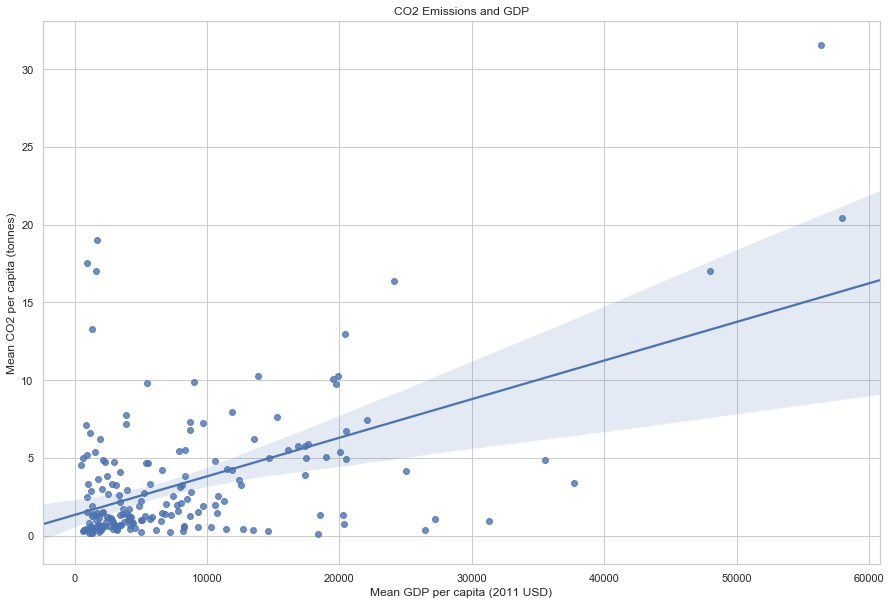

In [54]:
# Set style
sns.set(style='whitegrid')

# Drop countries that are not in both dataframes
y = df_co2_clean.drop('Liechtenstein').iloc[:,5:].mean(axis=1)  #[[2012','2013','2014']]
x = df_gdp.drop(['Monaco', 'San Marino']).mean(axis=1)   #[['2012','2013','2014']]

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.regplot(x, y)
ax.set(xlabel='Mean GDP per capita (2011 USD)', ylabel='Mean CO2 per capita (tonnes)', title='CO2 Emissions and GDP');

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


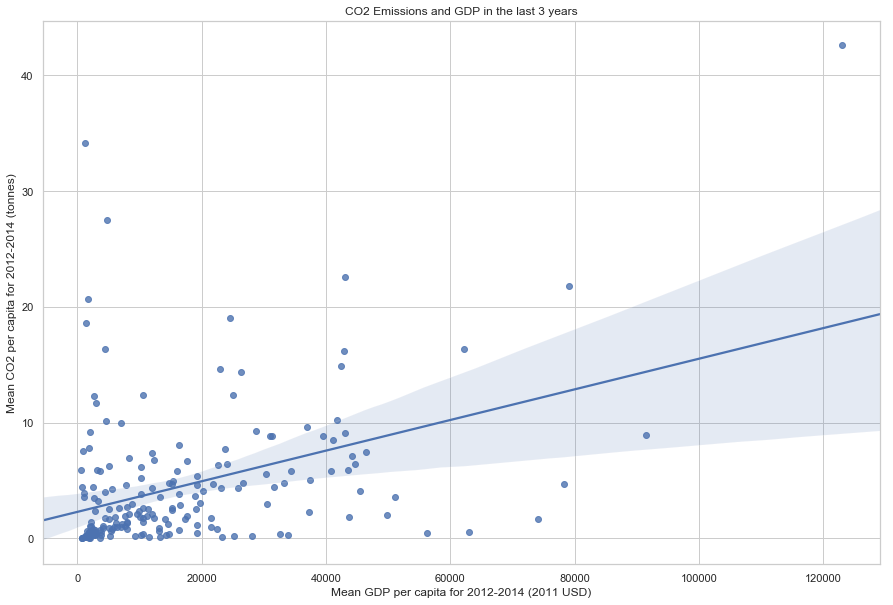

In [71]:
y = df_co2_clean.drop('Liechtenstein').iloc[:,-3:].mean(axis=1)
x = df_gdp.drop(['Monaco', 'San Marino']).iloc[:,-3:].mean(axis=1)

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.regplot(x, y)
ax.set(xlabel='Mean GDP per capita for 2012-2014 (2011 USD)', ylabel='Mean CO2 per capita for 2012-2014 (tonnes)', title='CO2 Emissions and GDP in the last 3 years');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!